In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Create DataFrame
data = pd.read_excel(r"C:\Users\Poonam\OneDrive\Desktop\Poonam Data Analysis\Product-Sales-Region.xlsx")
df = pd.DataFrame(data)
print(df)

           Date   Region  Product  Quantity  UnitPrice StoreLocation  \
0    2023-02-23     East   Laptop        14     163.60       Store B   
1    2024-12-19    South    Phone         1     544.01       Store A   
2    2023-05-10    North     Desk        14     346.18       Store B   
3    2025-02-26  Central    Chair        18     384.82       Store A   
4    2023-06-24     East     Desk        18     237.76       Store C   
...         ...      ...      ...       ...        ...           ...   
1495 2025-02-17     West     Desk        13     134.56       Store D   
1496 2024-01-11    South    Chair        18     209.75       Store C   
1497 2024-07-27     East     Desk         1     272.50       Store A   
1498 2024-12-03  Central  Monitor        14     262.67       Store A   
1499 2025-05-09     West    Chair        13     221.39       Store D   

     CustomerType  Discount Salesperson  TotalPrice PaymentMethod Promotion  \
0       Wholesale      0.00         Eva    2290.400     

In [3]:
# Check Data Types, Columns Name. 
print(df.describe)
print(df.dtypes)
print(df.columns)

<bound method NDFrame.describe of            Date   Region  Product  Quantity  UnitPrice StoreLocation  \
0    2023-02-23     East   Laptop        14     163.60       Store B   
1    2024-12-19    South    Phone         1     544.01       Store A   
2    2023-05-10    North     Desk        14     346.18       Store B   
3    2025-02-26  Central    Chair        18     384.82       Store A   
4    2023-06-24     East     Desk        18     237.76       Store C   
...         ...      ...      ...       ...        ...           ...   
1495 2025-02-17     West     Desk        13     134.56       Store D   
1496 2024-01-11    South    Chair        18     209.75       Store C   
1497 2024-07-27     East     Desk         1     272.50       Store A   
1498 2024-12-03  Central  Monitor        14     262.67       Store A   
1499 2025-05-09     West    Chair        13     221.39       Store D   

     CustomerType  Discount Salesperson  TotalPrice PaymentMethod Promotion  \
0       Wholesale     

In [4]:
print(df.dtypes)

Date             datetime64[ns]
Region                   object
Product                  object
Quantity                  int64
UnitPrice               float64
StoreLocation            object
CustomerType             object
Discount                float64
Salesperson              object
TotalPrice              float64
PaymentMethod            object
Promotion                object
Returned                  int64
OrderID                  object
CustomerName             object
ShippingCost            float64
OrderDate        datetime64[ns]
DeliveryDate     datetime64[ns]
RegionManager            object
dtype: object


In [5]:
# Change Data type from float to integer
columns = ['UnitPrice', 'Discount', 'TotalPrice', 'ShippingCost']
df[columns] = df[columns].astype(int)
print(df.dtypes)

Date             datetime64[ns]
Region                   object
Product                  object
Quantity                  int64
UnitPrice                 int64
StoreLocation            object
CustomerType             object
Discount                  int64
Salesperson              object
TotalPrice                int64
PaymentMethod            object
Promotion                object
Returned                  int64
OrderID                  object
CustomerName             object
ShippingCost              int64
OrderDate        datetime64[ns]
DeliveryDate     datetime64[ns]
RegionManager            object
dtype: object


In [6]:
# check info of the data
print(df.info)
print(df.head(15))

<bound method DataFrame.info of            Date   Region  Product  Quantity  UnitPrice StoreLocation  \
0    2023-02-23     East   Laptop        14        163       Store B   
1    2024-12-19    South    Phone         1        544       Store A   
2    2023-05-10    North     Desk        14        346       Store B   
3    2025-02-26  Central    Chair        18        384       Store A   
4    2023-06-24     East     Desk        18        237       Store C   
...         ...      ...      ...       ...        ...           ...   
1495 2025-02-17     West     Desk        13        134       Store D   
1496 2024-01-11    South    Chair        18        209       Store C   
1497 2024-07-27     East     Desk         1        272       Store A   
1498 2024-12-03  Central  Monitor        14        262       Store A   
1499 2025-05-09     West    Chair        13        221       Store D   

     CustomerType  Discount Salesperson  TotalPrice PaymentMethod Promotion  \
0       Wholesale       

In [7]:
# Find Null Values and replace with NA
print(df.notnull)
print(df.isnull().sum())
print(df['Promotion'].fillna('NA', inplace= True))

<bound method DataFrame.notnull of            Date   Region  Product  Quantity  UnitPrice StoreLocation  \
0    2023-02-23     East   Laptop        14        163       Store B   
1    2024-12-19    South    Phone         1        544       Store A   
2    2023-05-10    North     Desk        14        346       Store B   
3    2025-02-26  Central    Chair        18        384       Store A   
4    2023-06-24     East     Desk        18        237       Store C   
...         ...      ...      ...       ...        ...           ...   
1495 2025-02-17     West     Desk        13        134       Store D   
1496 2024-01-11    South    Chair        18        209       Store C   
1497 2024-07-27     East     Desk         1        272       Store A   
1498 2024-12-03  Central  Monitor        14        262       Store A   
1499 2025-05-09     West    Chair        13        221       Store D   

     CustomerType  Discount Salesperson  TotalPrice PaymentMethod Promotion  \
0       Wholesale    

In [8]:
# Change Order Date Format
df['Order_Date'] = pd.to_datetime(df['OrderDate'])
print(df['Order_Date'])
df['TotalPrice'] = df['Quantity']*df['UnitPrice']
print(df['TotalPrice'])

0      2023-02-23
1      2024-12-19
2      2023-05-10
3      2025-02-26
4      2023-06-24
          ...    
1495   2025-02-17
1496   2024-01-11
1497   2024-07-27
1498   2024-12-03
1499   2025-05-09
Name: Order_Date, Length: 1500, dtype: datetime64[ns]
0       2282
1        544
2       4844
3       6912
4       4266
        ... 
1495    1742
1496    3762
1497     272
1498    3668
1499    2873
Name: TotalPrice, Length: 1500, dtype: int64


In [9]:
# Product Wise Sales / Best Selling Product
Best_Product = df.groupby("Product")['TotalPrice'].sum()
print("Best Selling Product : ", "Product", Best_Product)

Best Selling Product :  Product Product
Chair      668363
Desk       601028
Laptop     735897
Monitor    702610
Phone      535710
Printer    742346
Tablet     734354
Name: TotalPrice, dtype: int64


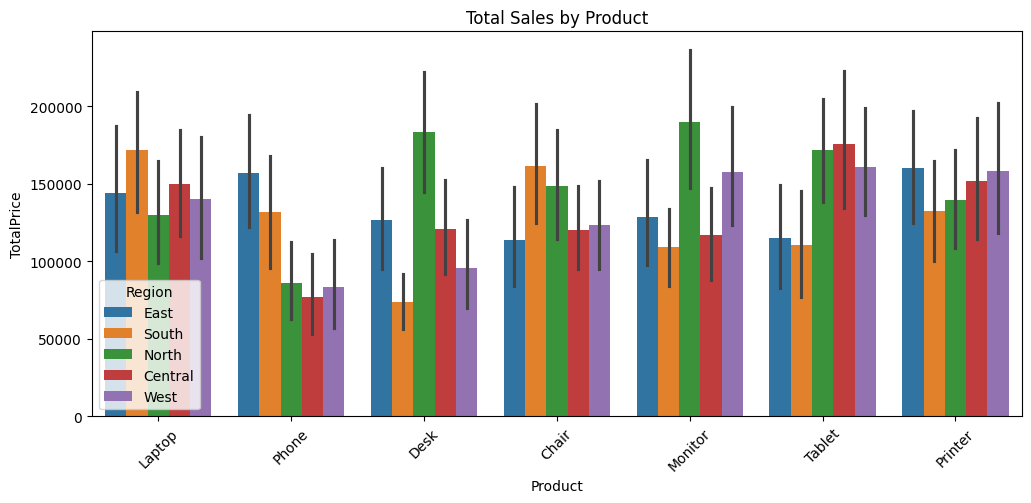

In [10]:
# Show Best Selling Product using Bar Plot
plt.figure(figsize=(12,5))
sns.barplot(data=df, x="Product", y="TotalPrice", hue = "Region", estimator=sum)
plt.title("Total Sales by Product")
plt.xticks(rotation=45)
plt.show()

In [11]:
# Month Wise Sale
df["Month"] = df['OrderDate'].dt.month
print(df["Month"])
Monthly_Sale = df.groupby("Month")['TotalPrice'].sum().sort_values(ascending=False)
print("Monthly Sale : ", "Month", Monthly_Sale)

0        2
1       12
2        5
3        2
4        6
        ..
1495     2
1496     1
1497     7
1498    12
1499     5
Name: Month, Length: 1500, dtype: int32
Monthly Sale :  Month Month
3     579479
1     531532
4     476504
6     468442
2     450192
5     436024
8     311873
11    303597
9     302714
7     301388
12    281509
10    277054
Name: TotalPrice, dtype: int64


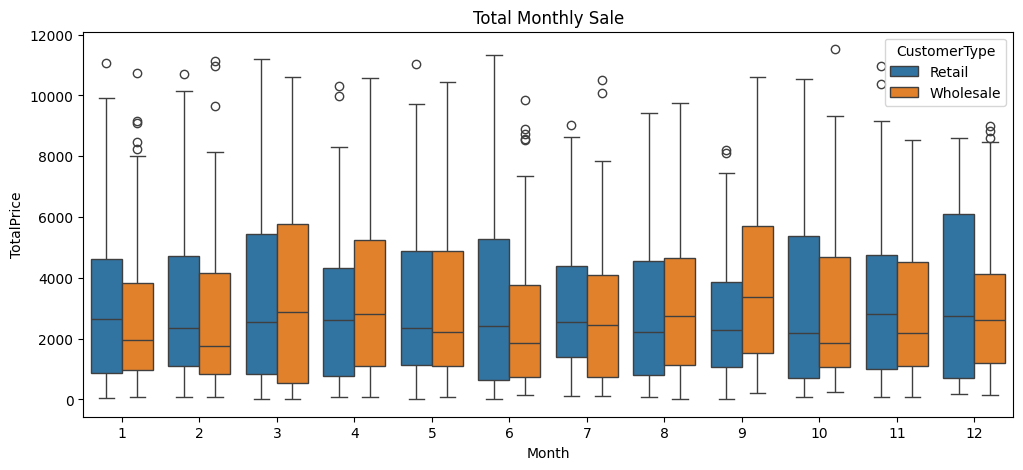

In [12]:
# Monthly Sale by using Box Plot
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x=df["Month"], y="TotalPrice", hue="CustomerType")
plt.title("Total Monthly Sale")
plt.show()

In [13]:
# Region Wise Sale
Region_Sale = df.groupby('Region')['TotalPrice'].sum().sort_values(ascending=False)
print("Region Wise Sale : ", "Region", Region_Sale)

Region Wise Sale :  Region Region
North      1049398
East        945833
West        920030
Central     913351
South       891696
Name: TotalPrice, dtype: int64


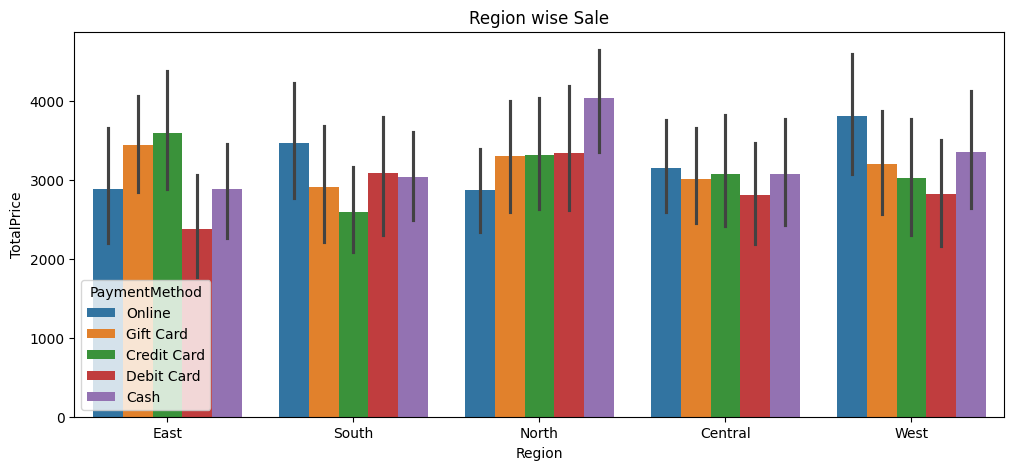

In [14]:
# Show Region wise sale by using 
plt.figure(figsize=(12,5))
sns.barplot(data=df, x=df["Region"], y="TotalPrice", hue="PaymentMethod")
plt.title("Region wise Sale")
plt.show()

In [15]:
# Top Sale Person
Best_SalePerson = df.groupby('Salesperson')['TotalPrice'].sum().sort_values(ascending=False)
print("Best Top Sales Person : ", "Salesperson", Best_SalePerson)

Best Top Sales Person :  Salesperson Salesperson
Bob       855517
Alice     841079
Frank     771429
Carlos    765708
Eva       755226
Diana     731349
Name: TotalPrice, dtype: int64


In [16]:
# Store / Location Wise Sale
Sales_By_Store = df.groupby('StoreLocation')['TotalPrice'].sum().sort_values(ascending=False)
print("Store / Location Sale Amount : ", "StoreLocation", Sales_By_Store)

Store / Location Sale Amount :  StoreLocation StoreLocation
Store D    1301674
Store A    1170436
Store C    1137641
Store B    1110557
Name: TotalPrice, dtype: int64


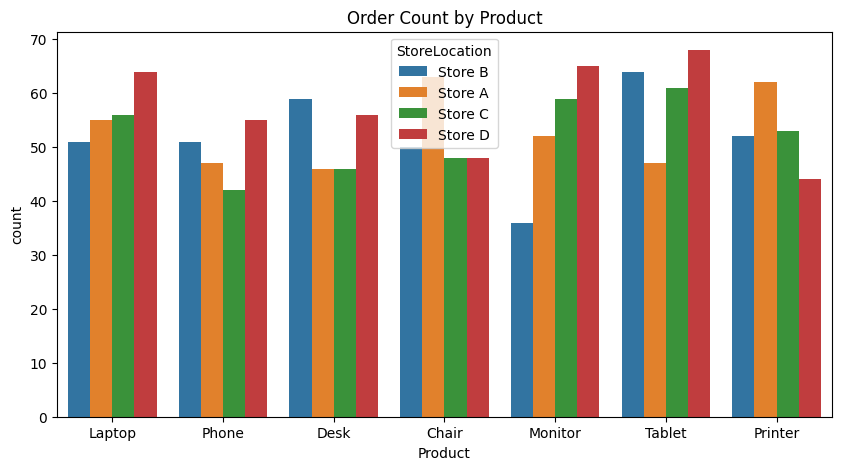

In [17]:
#Order Count by Product by using Count Plot on Store Basis
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Product', hue="StoreLocation")
plt.title("Order Count by Product")
plt.show()

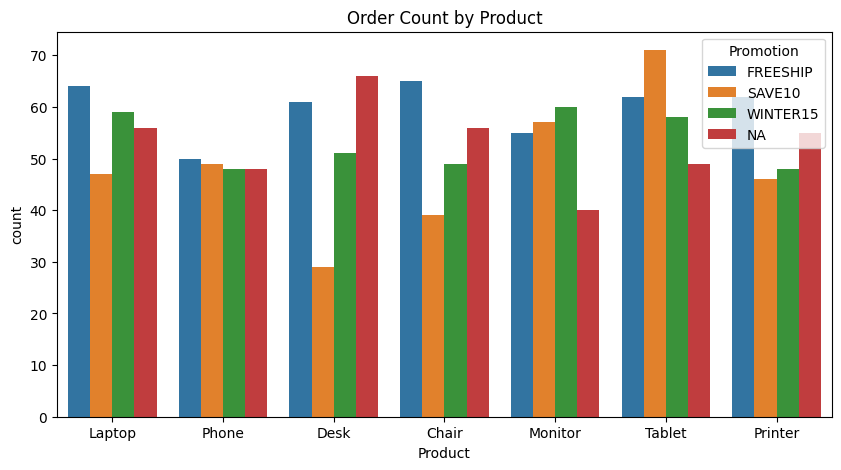

In [18]:
#Order Count by Product by using Count Plot  on Promotion basis
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Product', hue="Promotion")
plt.title("Order Count by Product")
plt.show()

In [19]:
# Most Used Payment Option
Most_Used_Payment_Methon = df.groupby("PaymentMethod")['TotalPrice'].sum().sort_values(ascending=False) 
print("Mostly used Payment Option : ", "PaymentMethod", Most_Used_Payment_Methon)

Mostly used Payment Option :  PaymentMethod PaymentMethod
Online         1045978
Cash           1029346
Credit Card     933322
Gift Card       881263
Debit Card      830399
Name: TotalPrice, dtype: int64


In [20]:
# Top Customers
Top_Customer = df.groupby("CustomerType")['TotalPrice'].sum().sort_values(ascending=False)
print("Top Customer : ", "CustomerType", Top_Customer)

Top Customer :  CustomerType CustomerType
Retail       2372955
Wholesale    2347353
Name: TotalPrice, dtype: int64


In [21]:
# Returned Product amount
Returned_Customer = df.groupby("Returned")['TotalPrice'].sum().nlargest
print("Returned Product Cost : ", "Product ",  Returned_Customer)

Returned Product Cost :  Product  <bound method Series.nlargest of Returned
0    3522835
1    1197473
Name: TotalPrice, dtype: int64>


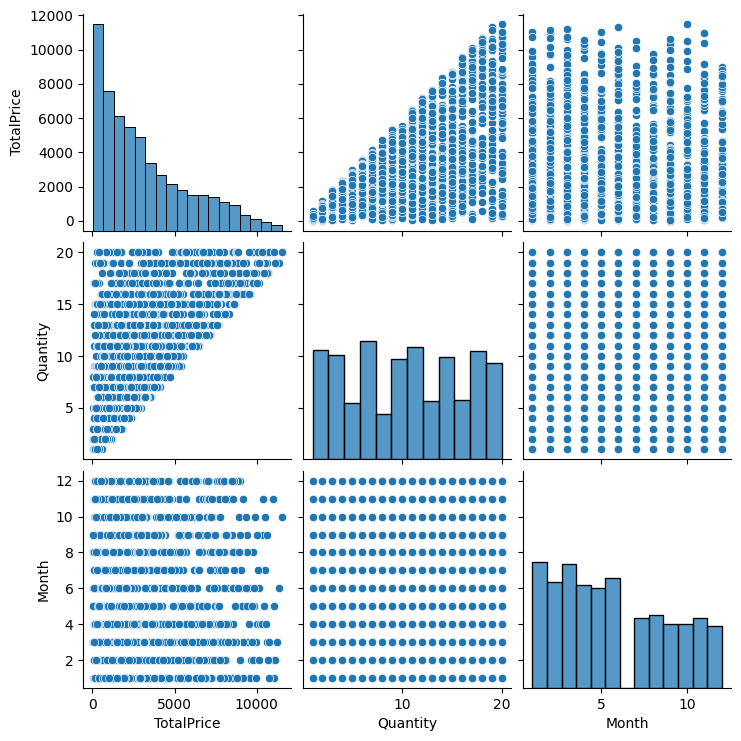

In [22]:
# Relationship between Columns
sns.pairplot(df[['TotalPrice', 'Quantity', 'Month', 'Product']])
plt.show()